In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display, YouTubeVideo
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
import quantstats as qs

In [33]:
data = pd.read_csv('./data_snapshot.csv')

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2019-07-30,52.189999,52.540001,51.827499,52.195000,50.373253,135742800,AAPL
1,2019-07-31,54.105000,55.342499,52.825001,53.259998,51.401073,277125600,AAPL
2,2019-08-01,53.474998,54.507500,51.685001,52.107498,50.288803,216071600,AAPL
3,2019-08-02,51.382500,51.607498,50.407501,51.005001,49.224781,163448400,AAPL
4,2019-08-05,49.497501,49.662498,48.145000,48.334999,46.647972,209572000,AAPL
...,...,...,...,...,...,...,...,...
6285,2024-07-23,489.839996,495.220001,487.720001,488.690002,488.690002,9455500,META
6286,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,META
6287,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,META
6288,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14209300,META


In [35]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [36]:
data

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2019-07-30,52.189999,52.540001,51.827499,52.195000,50.373253,135742800,AAPL
2019-07-31,54.105000,55.342499,52.825001,53.259998,51.401073,277125600,AAPL
2019-08-01,53.474998,54.507500,51.685001,52.107498,50.288803,216071600,AAPL
2019-08-02,51.382500,51.607498,50.407501,51.005001,49.224781,163448400,AAPL
2019-08-05,49.497501,49.662498,48.145000,48.334999,46.647972,209572000,AAPL
...,...,...,...,...,...,...,...
2024-07-23,489.839996,495.220001,487.720001,488.690002,488.690002,9455500,META
2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,META
2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,META


In [57]:
tickers = data['ticker'].unique().tolist()


 Daily Returns Plot:

AAPL


[*********************100%%**********************]  1 of 1 completed


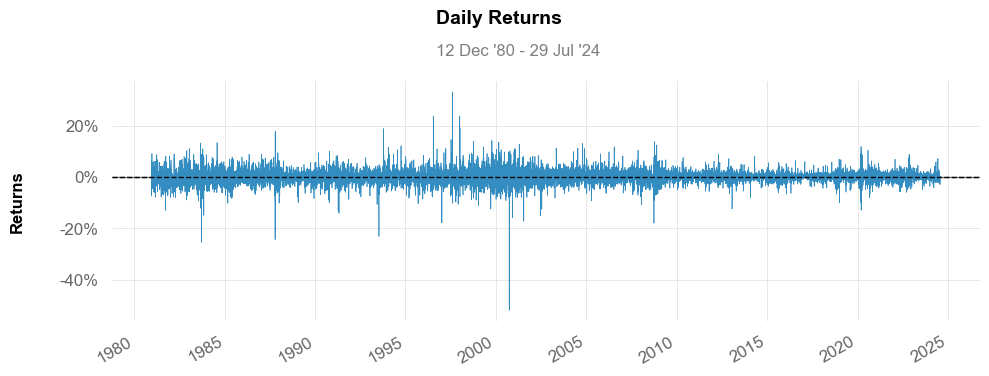

NVDA


[*********************100%%**********************]  1 of 1 completed


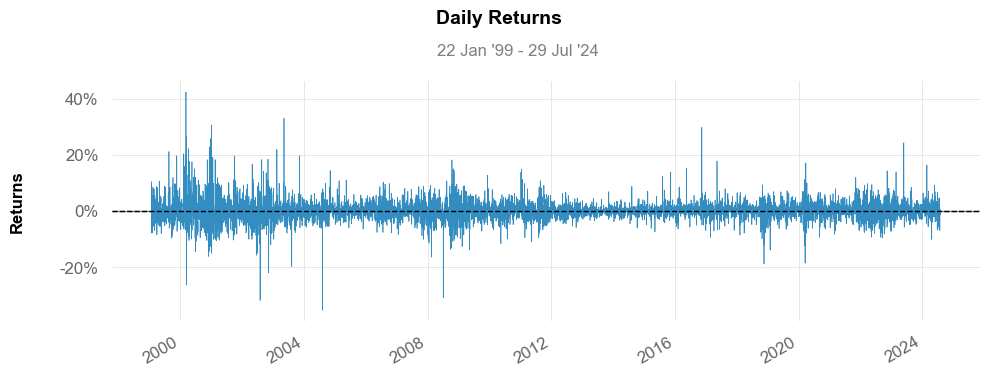

MSFT


[*********************100%%**********************]  1 of 1 completed


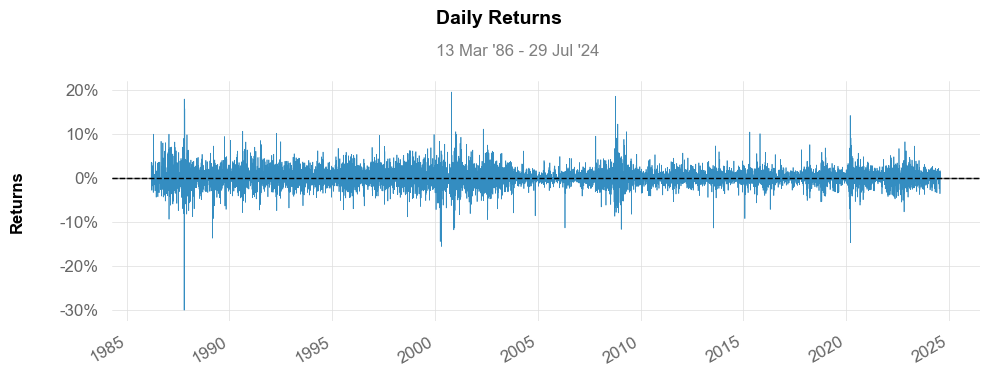

SPY


[*********************100%%**********************]  1 of 1 completed


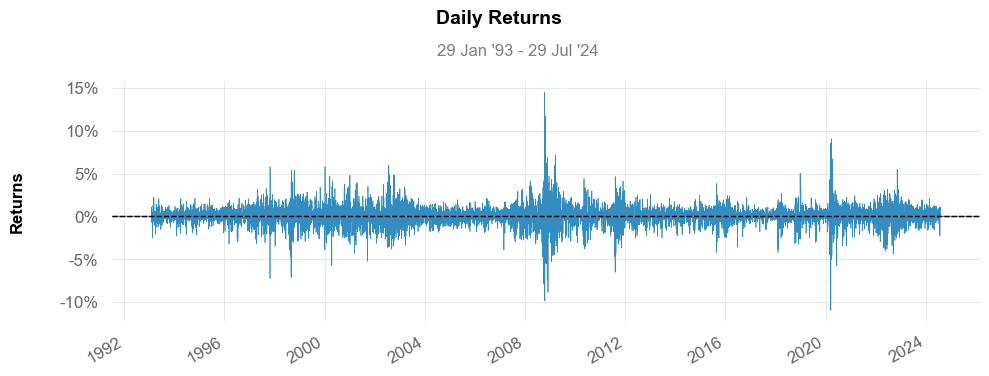

[*********************100%%**********************]  1 of 1 completed

META


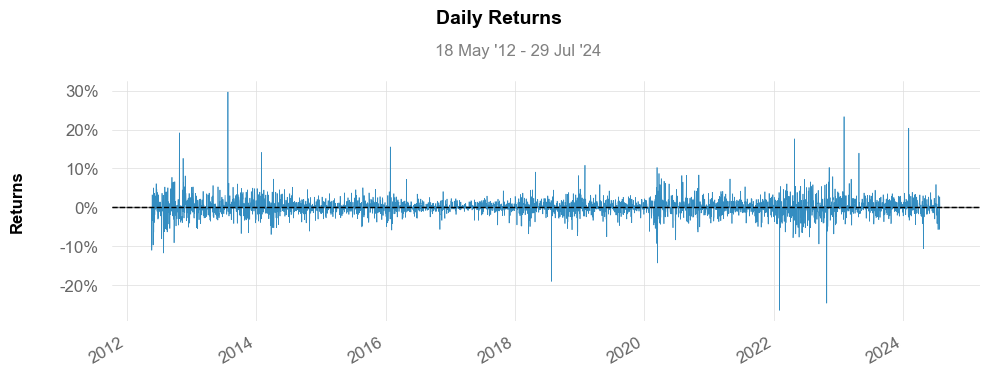

In [62]:
tickers = data['ticker'].unique().tolist()
print('\n Daily Returns Plot:\n')

for ticker in tickers:
    print(ticker)
    returns = qs.utils.download_returns(ticker)
    qs.plots.daily_returns(returns, benchmark=None)


 Cumulative Returns Plot:

AAPL


[*********************100%%**********************]  1 of 1 completed


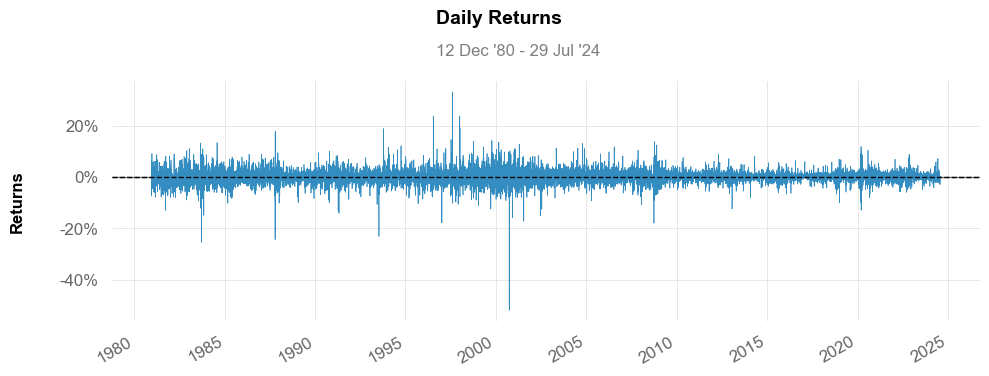

NVDA


[*********************100%%**********************]  1 of 1 completed


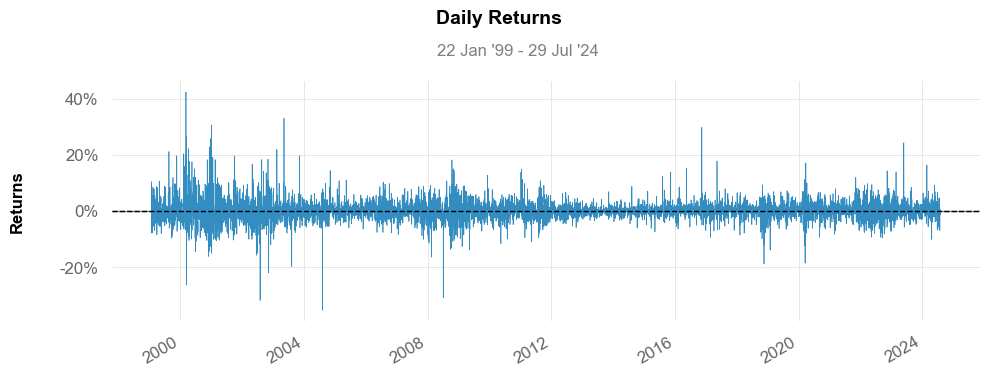

MSFT


[*********************100%%**********************]  1 of 1 completed


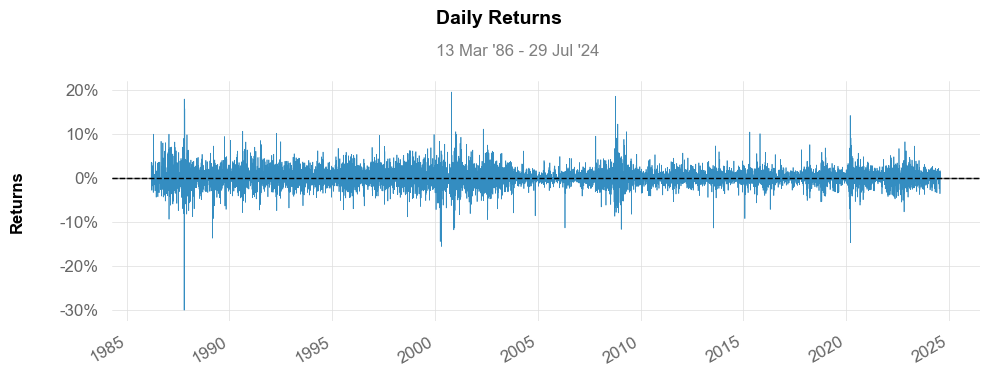

SPY


[*********************100%%**********************]  1 of 1 completed


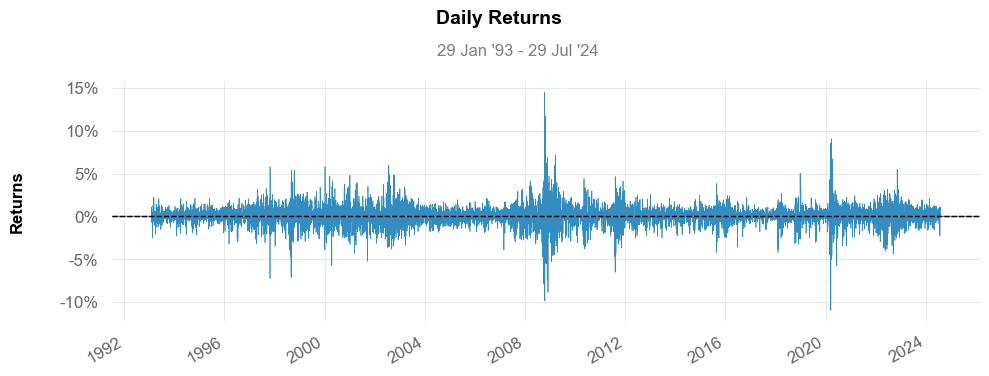

[*********************100%%**********************]  1 of 1 completed

META


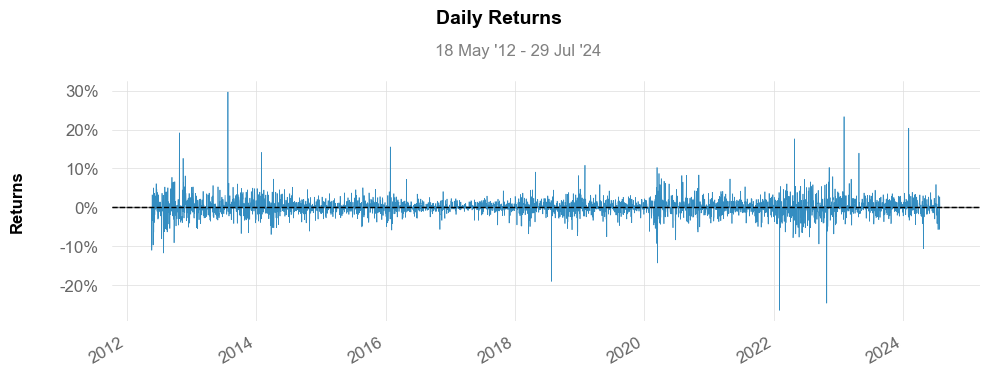

In [63]:
print('\n Cumulative Returns Plot:\n')

for ticker in tickers:
    print(ticker)
    returns = qs.utils.download_returns(ticker)
    qs.plots.daily_returns(returns, benchmark=None)

In [ ]:
tickers = {
    'AAPL': 2600,
    'NVDA': 700,
    'MSFT': 1800,
    'SPY': 5000,
    'META': 1300
}

In [66]:
weights = [0.2, 0.2, 0.2, 0.2, 0.2]  # Define weights for each stock
weighted_returns = pd.DataFrame()

for i, ticker in enumerate(tickers):
    # Download returns for the ticker
    returns = qs.utils.download_returns(ticker)
    # Multiply returns by the corresponding weight
    weighted_returns[ticker] = returns * weights[i]

# Sum the weighted returns to create the portfolio
portfolio_returns = weighted_returns.sum(axis=1)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                           Strategy
-------------------------  -----------
Start Period               1980-12-12
End Period                 2024-07-29
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          137,710.21%
CAGR﹪                     12.11%

Sharpe                     0.87
Prob. Sharpe Ratio         100.0%
Smart Sharpe               0.83
Sortino                    1.27
Smart Sortino              1.22
Sortino/√2                 0.9
Smart Sortino/√2           0.86
Omega                      1.17

Max Drawdown               -53.44%
Longest DD Days            1106
Volatility (ann.)          21.88%
Calmar                     0.23
Skew                       -0.02
Kurtosis                   7.75

Expected Daily %           0.07%
Expected Monthly %         1.39%
Expected Yearly %          17.43%
Kelly Criterion            7.95%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.19%
Expected Shortfall (cVaR)  -2.19%

Max Consecutive Win

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-12-27,2008-11-20,2011-01-05,1106,-53.440616,-50.122530
2,2002-01-04,2002-10-09,2004-11-04,1036,-49.192102,-45.947772
3,2021-12-28,2022-11-03,2023-05-25,514,-45.209354,-43.234123
4,2000-09-05,2000-12-21,2001-12-31,483,-43.229715,-39.930166
5,2018-09-04,2018-12-24,2019-10-10,402,-31.790554,-27.516627


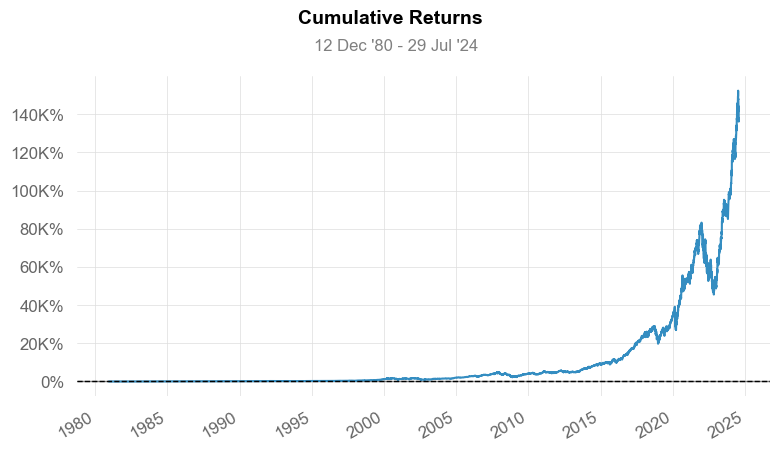

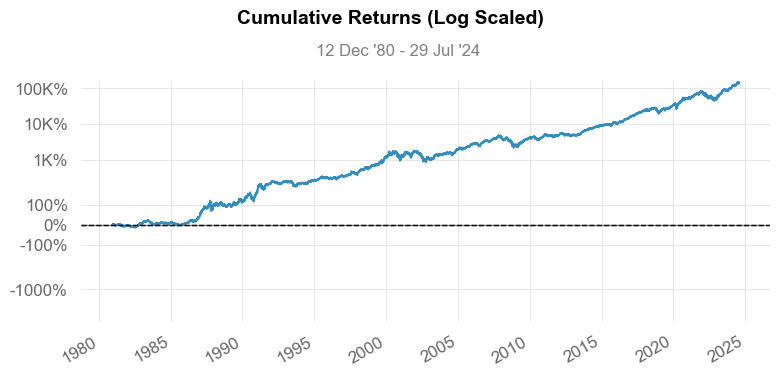

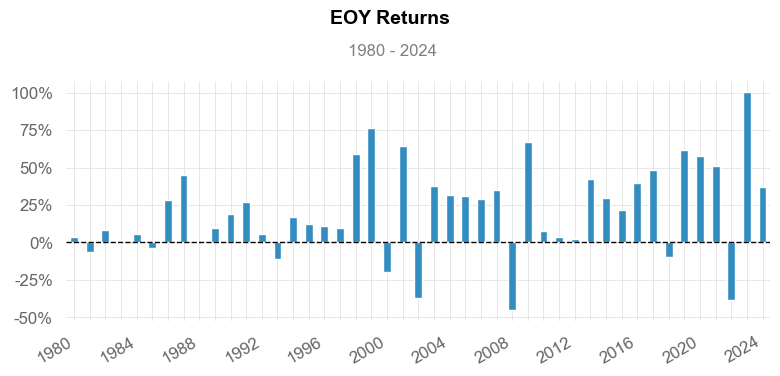

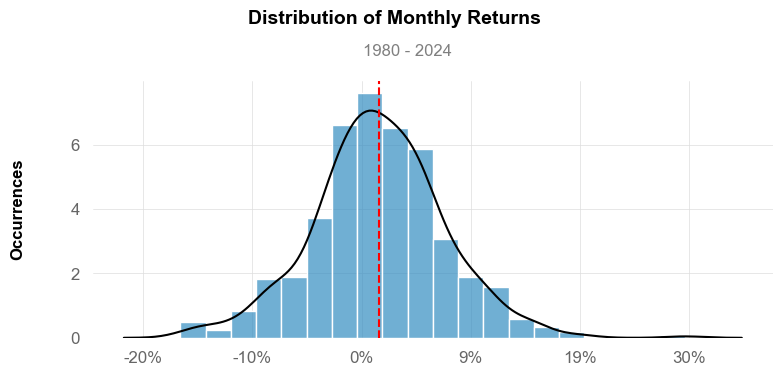

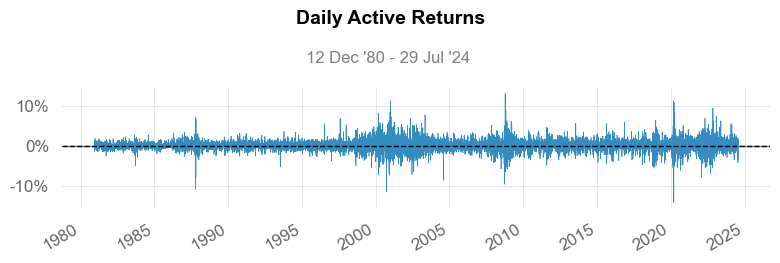

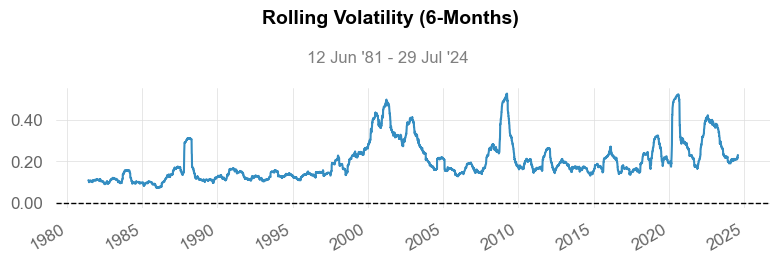

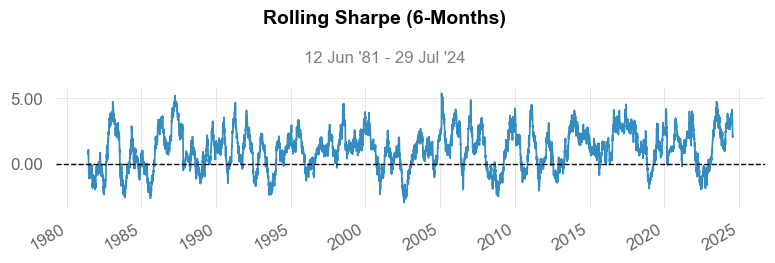

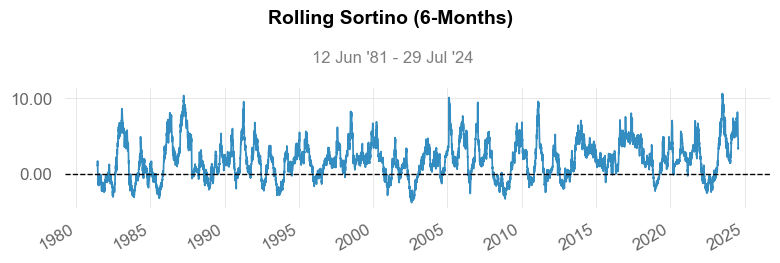

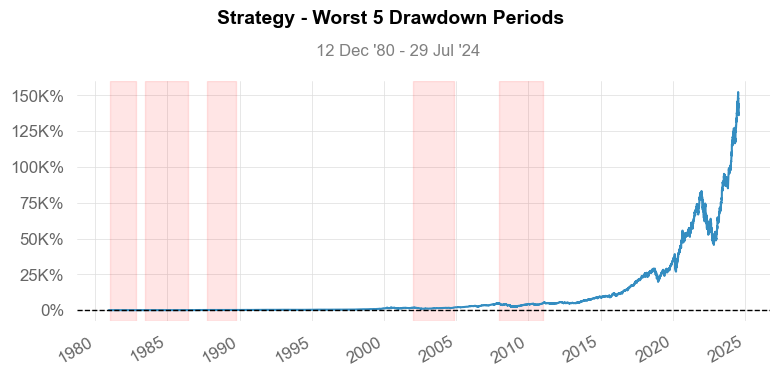

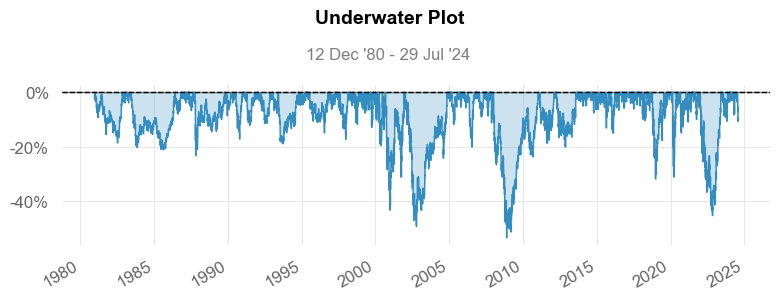

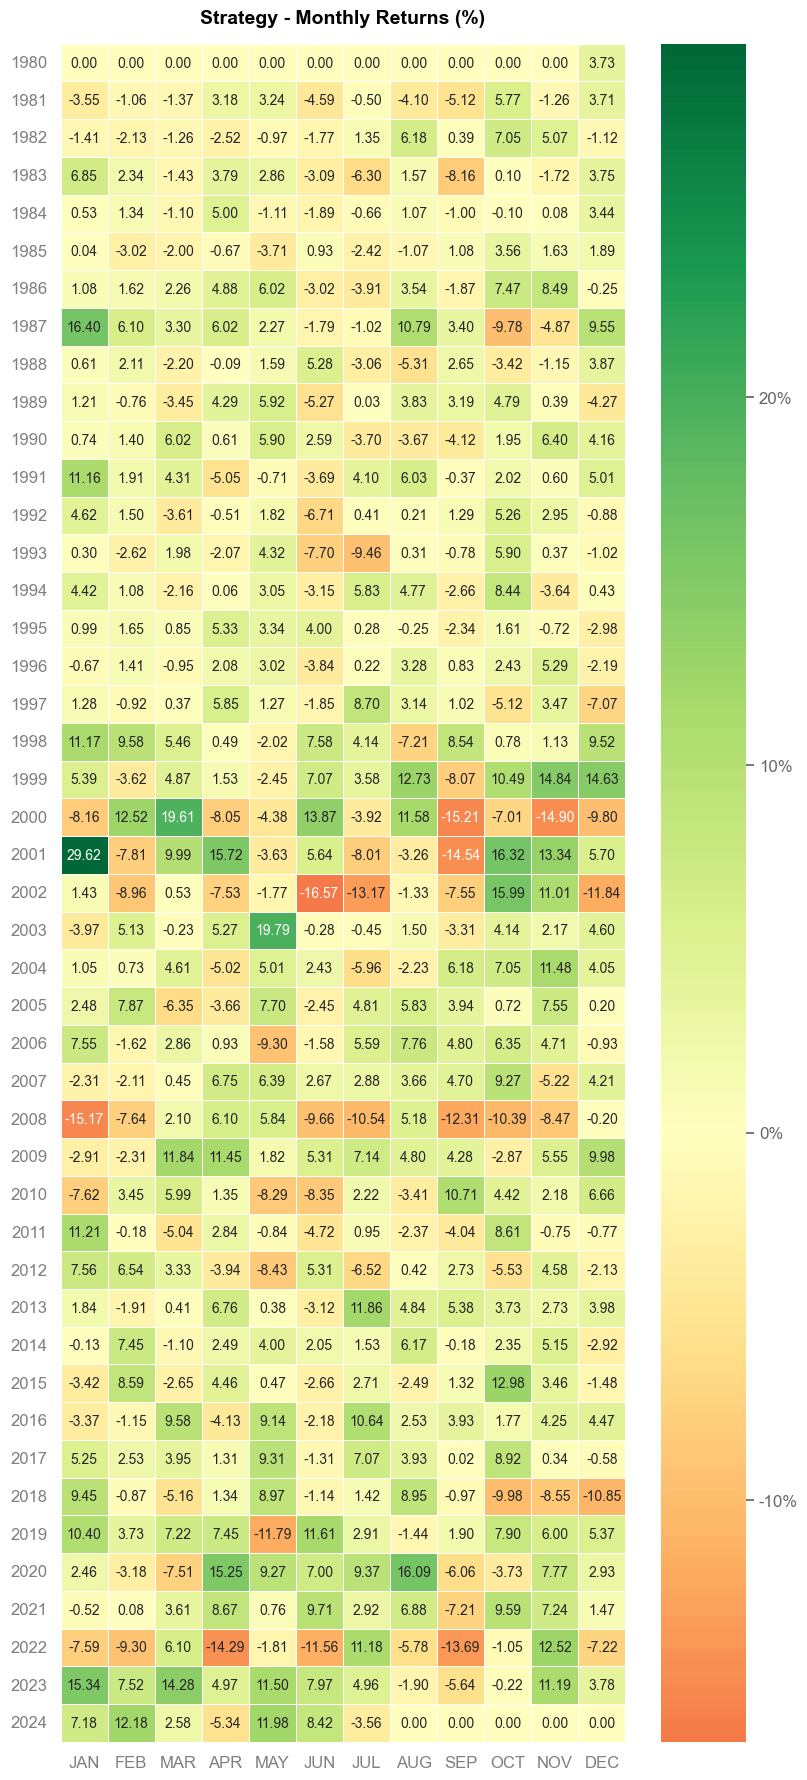

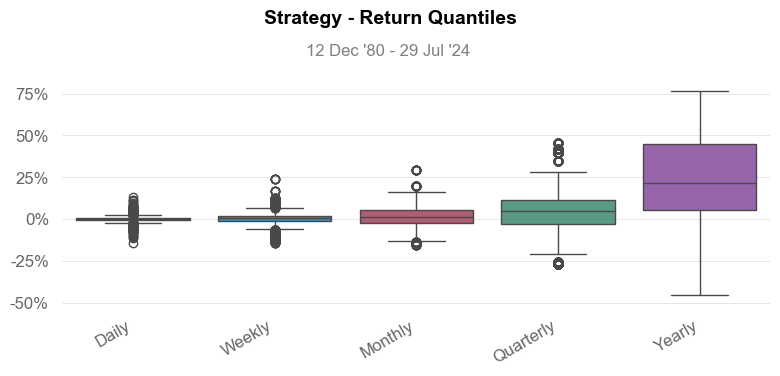

In [67]:
qs.reports.full(portfolio_returns, benchmark = None)